In [1]:
source("../config_sing.R")

── Attaching packages ──────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
library(cowplot)

In [3]:
fdiry = file.path(
    FD_ANN, 
    "motif_cluster_jvierstra", 
    "hg38_archetype_motifs_v1")
fglob = file.path(fdiry, "dist_chr*")
Sys.glob(fglob)

[1] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr1" 
 [2] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr10"
 [3] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr11"
 [4] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr12"
 [5] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr13"
 [6] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr14"
 [7] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr15"
 [8] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr16"
 [9] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr17"
[10] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr18"
[11] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr19"
[12] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr2" 
[13] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr20"
[14] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr21"
[15] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr22"
[16] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr3" 
[17] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr4" 
[18] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr5" 
[19] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr6" 
[20] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr7" 
[21] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr8" 
[22] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chr9" 
[23] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chrX" 
[24] "/home/mount/work/annotation/motif_cluster_jvierstra/hg38_archetype_motifs_v1/dist_chrY"

In [5]:
fdiry = file.path(
    FD_ANN, 
    "motif_cluster_jvierstra", 
    "hg38_archetype_motifs_v1")
fname = "count_motif.txt"
cnames = c("Chrom", "Motif", "Count")

chroms  = c(1:22, "X", "Y")
lst_dat = lapply(chroms, function(chrom){
    x = paste0("chr",      chrom)
    y = paste0("dist_chr", chrom)
    
    fpath = file.path(fdiry, y, fname)
    dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE) %>% 
        mutate(Chrom = x)
    return(dat)
})

dat_cnt_tot = bind_rows(lst_dat) %>% 
    mutate(Motif = str_remove(Motif, "_merge.bed"))
head(dat_cnt_tot)

Chrom,Motif,Count
<chr>,<chr>,<dbl>
chr1,AHR,22491
chr1,AIRE,44531
chr1,AP1_1,226207
chr1,AP1_2,207980
chr1,ARI5A,33406
chr1,ARI5B,43610


In [6]:
fdiry = file.path(
    FD_ANN, 
    "motif_cluster_jvierstra", 
    "hg38_archetype_motifs_v1")
fname = "count_motif_filter95.txt"
cnames = c("Chrom", "Motif", "Count")

chroms  = c(1:22, "X", "Y")
lst_dat = lapply(chroms, function(chrom){
    x = paste0("chr",      chrom)
    y = paste0("dist_chr", chrom)
    
    fpath = file.path(fdiry, y, fname)
    dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE) %>% 
        mutate(Chrom = x)
    return(dat)
})

dat_cnt_f95 = bind_rows(lst_dat) %>% 
    mutate(Motif = str_remove(Motif, "_merge.bed"))
head(dat_cnt_f95)

Chrom,Motif,Count
<chr>,<chr>,<dbl>
chr1,AHR,0
chr1,AIRE,133
chr1,AP1_1,5599
chr1,AP1_2,7170
chr1,ARI5A,0
chr1,ARI5B,0


In [7]:
cnames = c(
    "MTF1_Chrom",
    "MTF1_Start",
    "MTF1_End",
    "MTF1",
    "MTF1_score",
    "MTF2_Chrom",
    "MTF2_Start",
    "MTF2_End",
    "MTF2",
    "MTF2_score",
    "Distance")

###
mtf1 = "AP1_1"
mtf2 = "NR_20"
fdiry = file.path(
    FD_ANN, 
    "motif_cluster_jvierstra", 
    "hg38_archetype_motifs_v1")
fname = paste0(mtf1, "_", mtf2, ".bed")

###
chroms  = c(1:22, "X", "Y")
lst_dat = lapply(chroms, function(chrom){
    x     = paste0("dist_chr", chrom)
    fpath = file.path(fdiry, x, fname)
    dat   = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
    return(dat)
})
dat_dist_AB = bind_rows(lst_dat)

###
mtf1 = "NR_20"
mtf2 = "AP1_1"
fdiry = file.path(
    FD_ANN, 
    "motif_cluster_jvierstra", 
    "hg38_archetype_motifs_v1")
fname = paste0(mtf1, "_", mtf2, ".bed")

###
chroms  = c(1:22, "X", "Y")
lst_dat = lapply(chroms, function(chrom){
    x     = paste0("dist_chr", chrom)
    fpath = file.path(fdiry, x, fname)
    dat   = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
    return(dat)
})

###
dat_dist_BA = bind_rows(lst_dat)

In [8]:
head(dat_dist_AB)

MTF1_Chrom,MTF1_Start,MTF1_End,MTF1,MTF1_score,MTF2_Chrom,MTF2_Start,MTF2_End,MTF2,MTF2_score,Distance
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr1,12190,12198,AP1/1,7.43060,chr1,14615,14629,NR/20,7.1956,2418
chr1,12950,12959,AP1/1,6.79415,chr1,14615,14629,NR/20,7.1956,1657
chr1,13971,13980,AP1/1,10.96380,chr1,14615,14629,NR/20,7.1956,636
chr1,14158,14166,AP1/1,6.73210,chr1,14615,14629,NR/20,7.1956,450
chr1,15090,15098,AP1/1,7.53870,chr1,15090,15104,NR/20,7.8854,0
chr1,15297,15305,AP1/1,7.65610,chr1,15247,15261,NR/20,7.8434,37


In [9]:
head(dat_dist_BA)

MTF1_Chrom,MTF1_Start,MTF1_End,MTF1,MTF1_score,MTF2_Chrom,MTF2_Start,MTF2_End,MTF2,MTF2_score,Distance
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr1,14615,14629,NR/20,7.1956,chr1,14158,14166,AP1/1,6.7321,450
chr1,15090,15104,NR/20,7.8854,chr1,15090,15098,AP1/1,7.5387,0
chr1,15247,15261,NR/20,7.8434,chr1,15297,15305,AP1/1,7.6561,37
chr1,17444,17458,NR/20,8.6846,chr1,15297,15305,AP1/1,7.6561,2140
chr1,19010,19025,NR/20,6.8888,chr1,21549,21557,AP1/1,8.2049,2525
chr1,19846,19860,NR/20,8.2151,chr1,21549,21557,AP1/1,8.2049,1690


In [11]:
dat1 = dat_cnt_tot %>% dplyr::filter(Motif %in% c("AP1_1", "NR_20"))
head(dat1)

Chrom,Motif,Count
<chr>,<chr>,<dbl>
chr1,AP1_1,226207
chr1,NR_20,81649
chr2,AP1_1,224460
chr2,NR_20,87275
chr3,AP1_1,181468
chr3,NR_20,71559


In [14]:
dat2 = dat_dist_AB %>% 
    dplyr::filter(Distance <= 1000) %>% 
    mutate(Chrom = MTF1_Chrom) %>%
    group_by(Chrom) %>% 
    summarize(Count = n()) %>%
    mutate(Motif="AP1_1_NR_20")
head(dat2)

Chrom,Count,Motif
<chr>,<int>,<chr>
chr1,112591,AP1_1_NR_20
chr10,65838,AP1_1_NR_20
chr11,63029,AP1_1_NR_20
chr12,63554,AP1_1_NR_20
chr13,45462,AP1_1_NR_20
chr14,42559,AP1_1_NR_20


In [15]:
dat3 = dat_dist_BA %>% 
    dplyr::filter(Distance <= 1000) %>% 
    mutate(Chrom = MTF1_Chrom) %>%
    group_by(Chrom) %>% 
    summarize(Count = n()) %>%
    mutate(Motif="NR_20_AP1_1")
head(dat3)

Chrom,Count,Motif
<chr>,<int>,<chr>
chr1,68788,NR_20_AP1_1
chr10,40860,NR_20_AP1_1
chr11,40059,NR_20_AP1_1
chr12,38827,NR_20_AP1_1
chr13,29764,NR_20_AP1_1
chr14,26643,NR_20_AP1_1


In [18]:
dat = bind_rows(dat1, dat2, dat3)
dat$Motif = factor(dat$Motif, levels=c("AP1_1", "NR_20", "AP1_1_NR_20", "NR_20_AP1_1"))
dat$Chrom = factor(dat$Chrom, levels=paste0("chr", c(1:22, "X", "Y")))
gpt = ggplot(dat, aes(x=Chrom, y=Count, fill=Motif)) + 
    geom_histogram(stat = "identity", position="dodge") + 
    #scale_y_log10() +
    labs(x="") +
    theme_cowplot() +
    background_grid() + 
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=20, angle=90, hjust=1, vjust=0.5))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


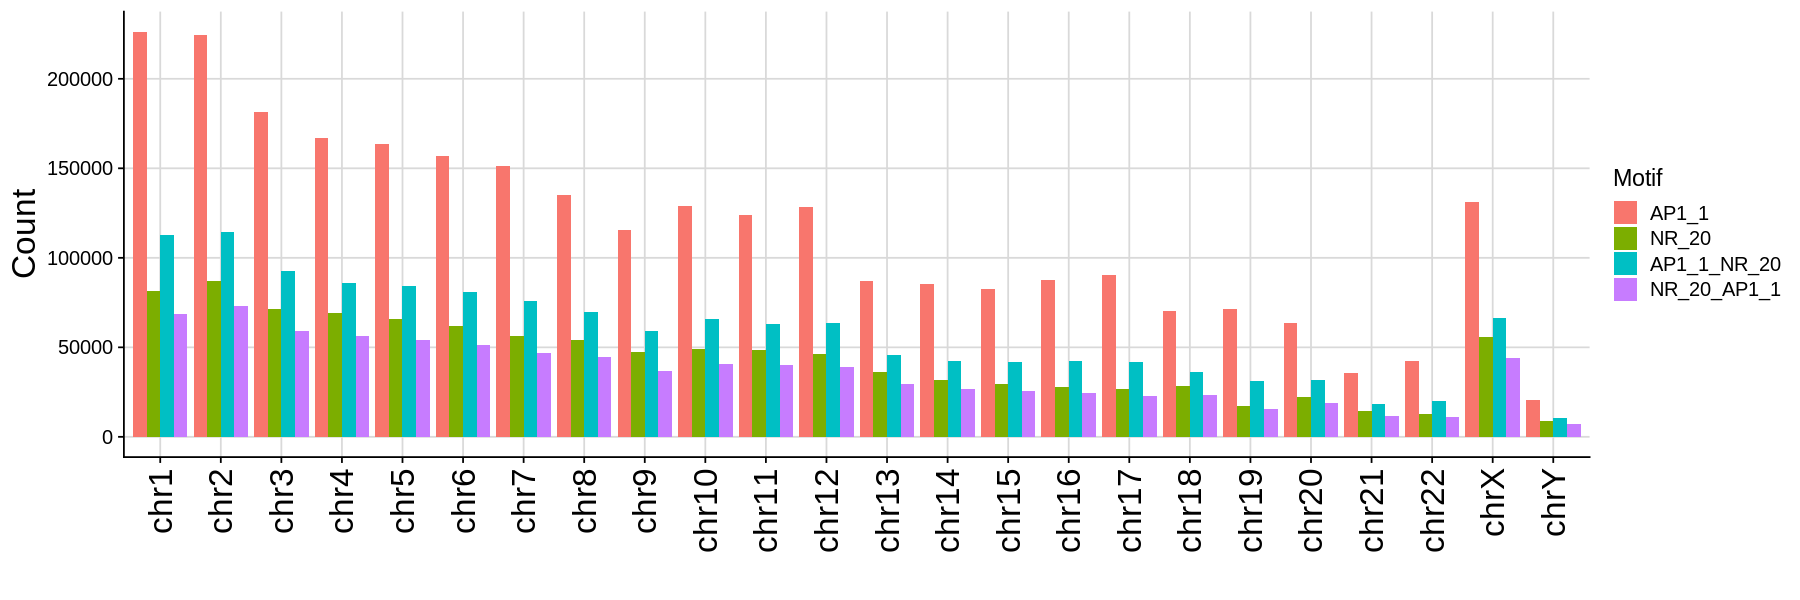

In [19]:
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

In [20]:
dat1 = dat_cnt_f95 %>% dplyr::filter(Motif %in% c("AP1_1", "NR_20"))
head(dat1)

Chrom,Motif,Count
<chr>,<chr>,<dbl>
chr1,AP1_1,5599
chr1,NR_20,1671
chr2,AP1_1,5762
chr2,NR_20,1625
chr3,AP1_1,4557
chr3,NR_20,1361


In [21]:
head(dat_dist_AB)

MTF1_Chrom,MTF1_Start,MTF1_End,MTF1,MTF1_score,MTF2_Chrom,MTF2_Start,MTF2_End,MTF2,MTF2_score,Distance
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr1,12190,12198,AP1/1,7.43060,chr1,14615,14629,NR/20,7.1956,2418
chr1,12950,12959,AP1/1,6.79415,chr1,14615,14629,NR/20,7.1956,1657
chr1,13971,13980,AP1/1,10.96380,chr1,14615,14629,NR/20,7.1956,636
chr1,14158,14166,AP1/1,6.73210,chr1,14615,14629,NR/20,7.1956,450
chr1,15090,15098,AP1/1,7.53870,chr1,15090,15104,NR/20,7.8854,0
chr1,15297,15305,AP1/1,7.65610,chr1,15247,15261,NR/20,7.8434,37


In [23]:
dat2 = dat_dist_AB %>% 
    dplyr::filter(
        Distance   <= 1000,
        MTF1_score >= 10.81,
        MTF2_score >= 10.81) %>% 
    mutate(Chrom = MTF1_Chrom) %>%
    group_by(Chrom) %>% 
    summarize(Count = n()) %>%
    mutate(Motif="AP1_1_NR_20")
head(dat2)

Chrom,Count,Motif
<chr>,<int>,<chr>
chr1,57,AP1_1_NR_20
chr10,39,AP1_1_NR_20
chr11,42,AP1_1_NR_20
chr12,31,AP1_1_NR_20
chr13,23,AP1_1_NR_20
chr14,21,AP1_1_NR_20


In [22]:
dat3 = dat_dist_BA %>% 
    dplyr::filter(
        Distance   <= 1000,
        MTF1_score >= 10.81,
        MTF2_score >= 10.81) %>% 
    mutate(Chrom = MTF1_Chrom) %>%
    group_by(Chrom) %>% 
    summarize(Count = n()) %>%
    mutate(Motif="NR_20_AP1_1")
head(dat3)

Chrom,Count,Motif
<chr>,<int>,<chr>
chr1,28,NR_20_AP1_1
chr10,24,NR_20_AP1_1
chr11,32,NR_20_AP1_1
chr12,28,NR_20_AP1_1
chr13,15,NR_20_AP1_1
chr14,16,NR_20_AP1_1


In [30]:
dat = bind_rows(dat1, dat2, dat3)
dat$Motif = factor(dat$Motif, levels=c("AP1_1", "NR_20", "AP1_1_NR_20", "NR_20_AP1_1"))
dat$Chrom = factor(dat$Chrom, levels=paste0("chr", c(1:22, "X", "Y")))
gpt = ggplot(dat, aes(x=Chrom, y=Count, fill=Motif)) + 
    geom_histogram(stat = "identity", position="dodge") + 
    scale_y_log10() +
    labs(x="") +
    theme_cowplot() +
    background_grid() + 
    theme(
        axis.title  = element_text(size=20),
        axis.text.x = element_text(size=20, angle=90, hjust=1, vjust=0.5))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


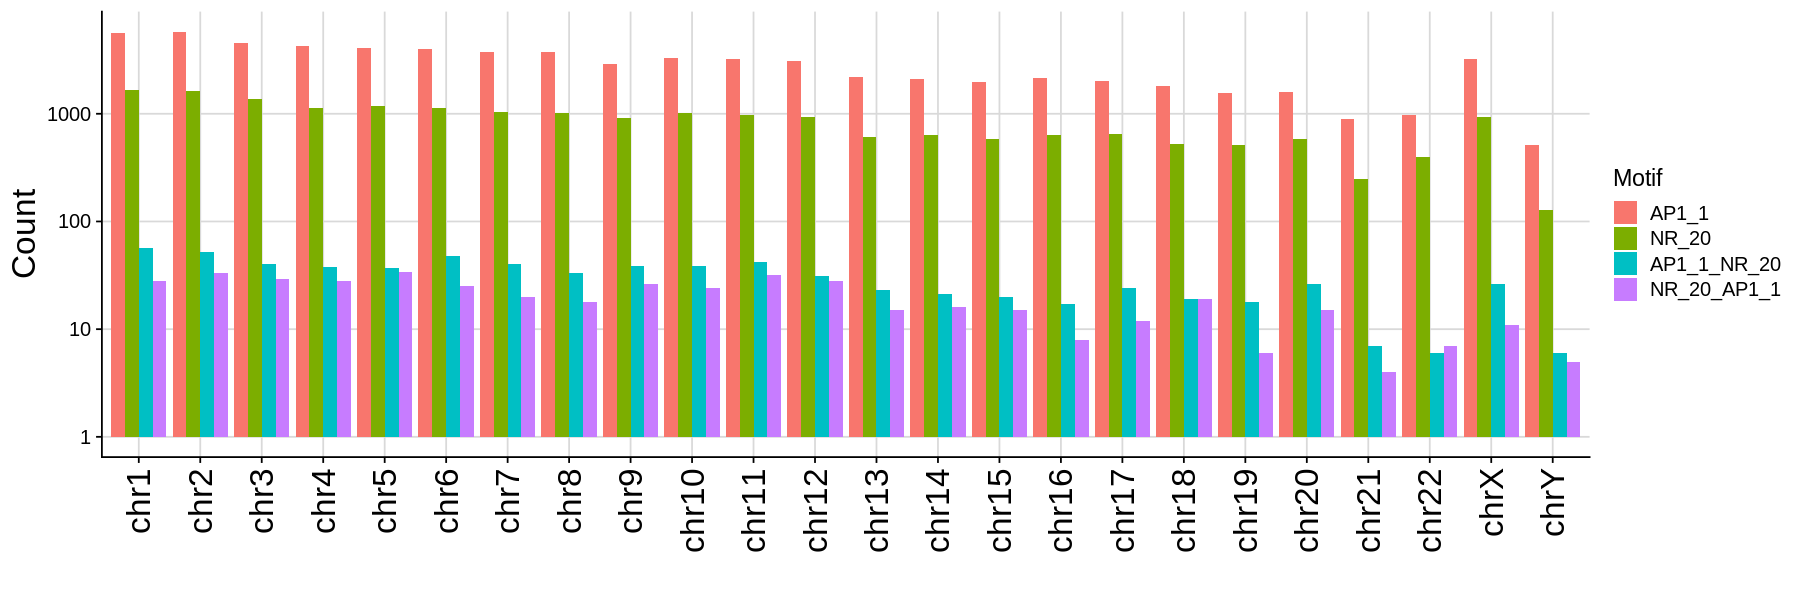

In [31]:
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 245 rows containing missing values (geom_bar).”


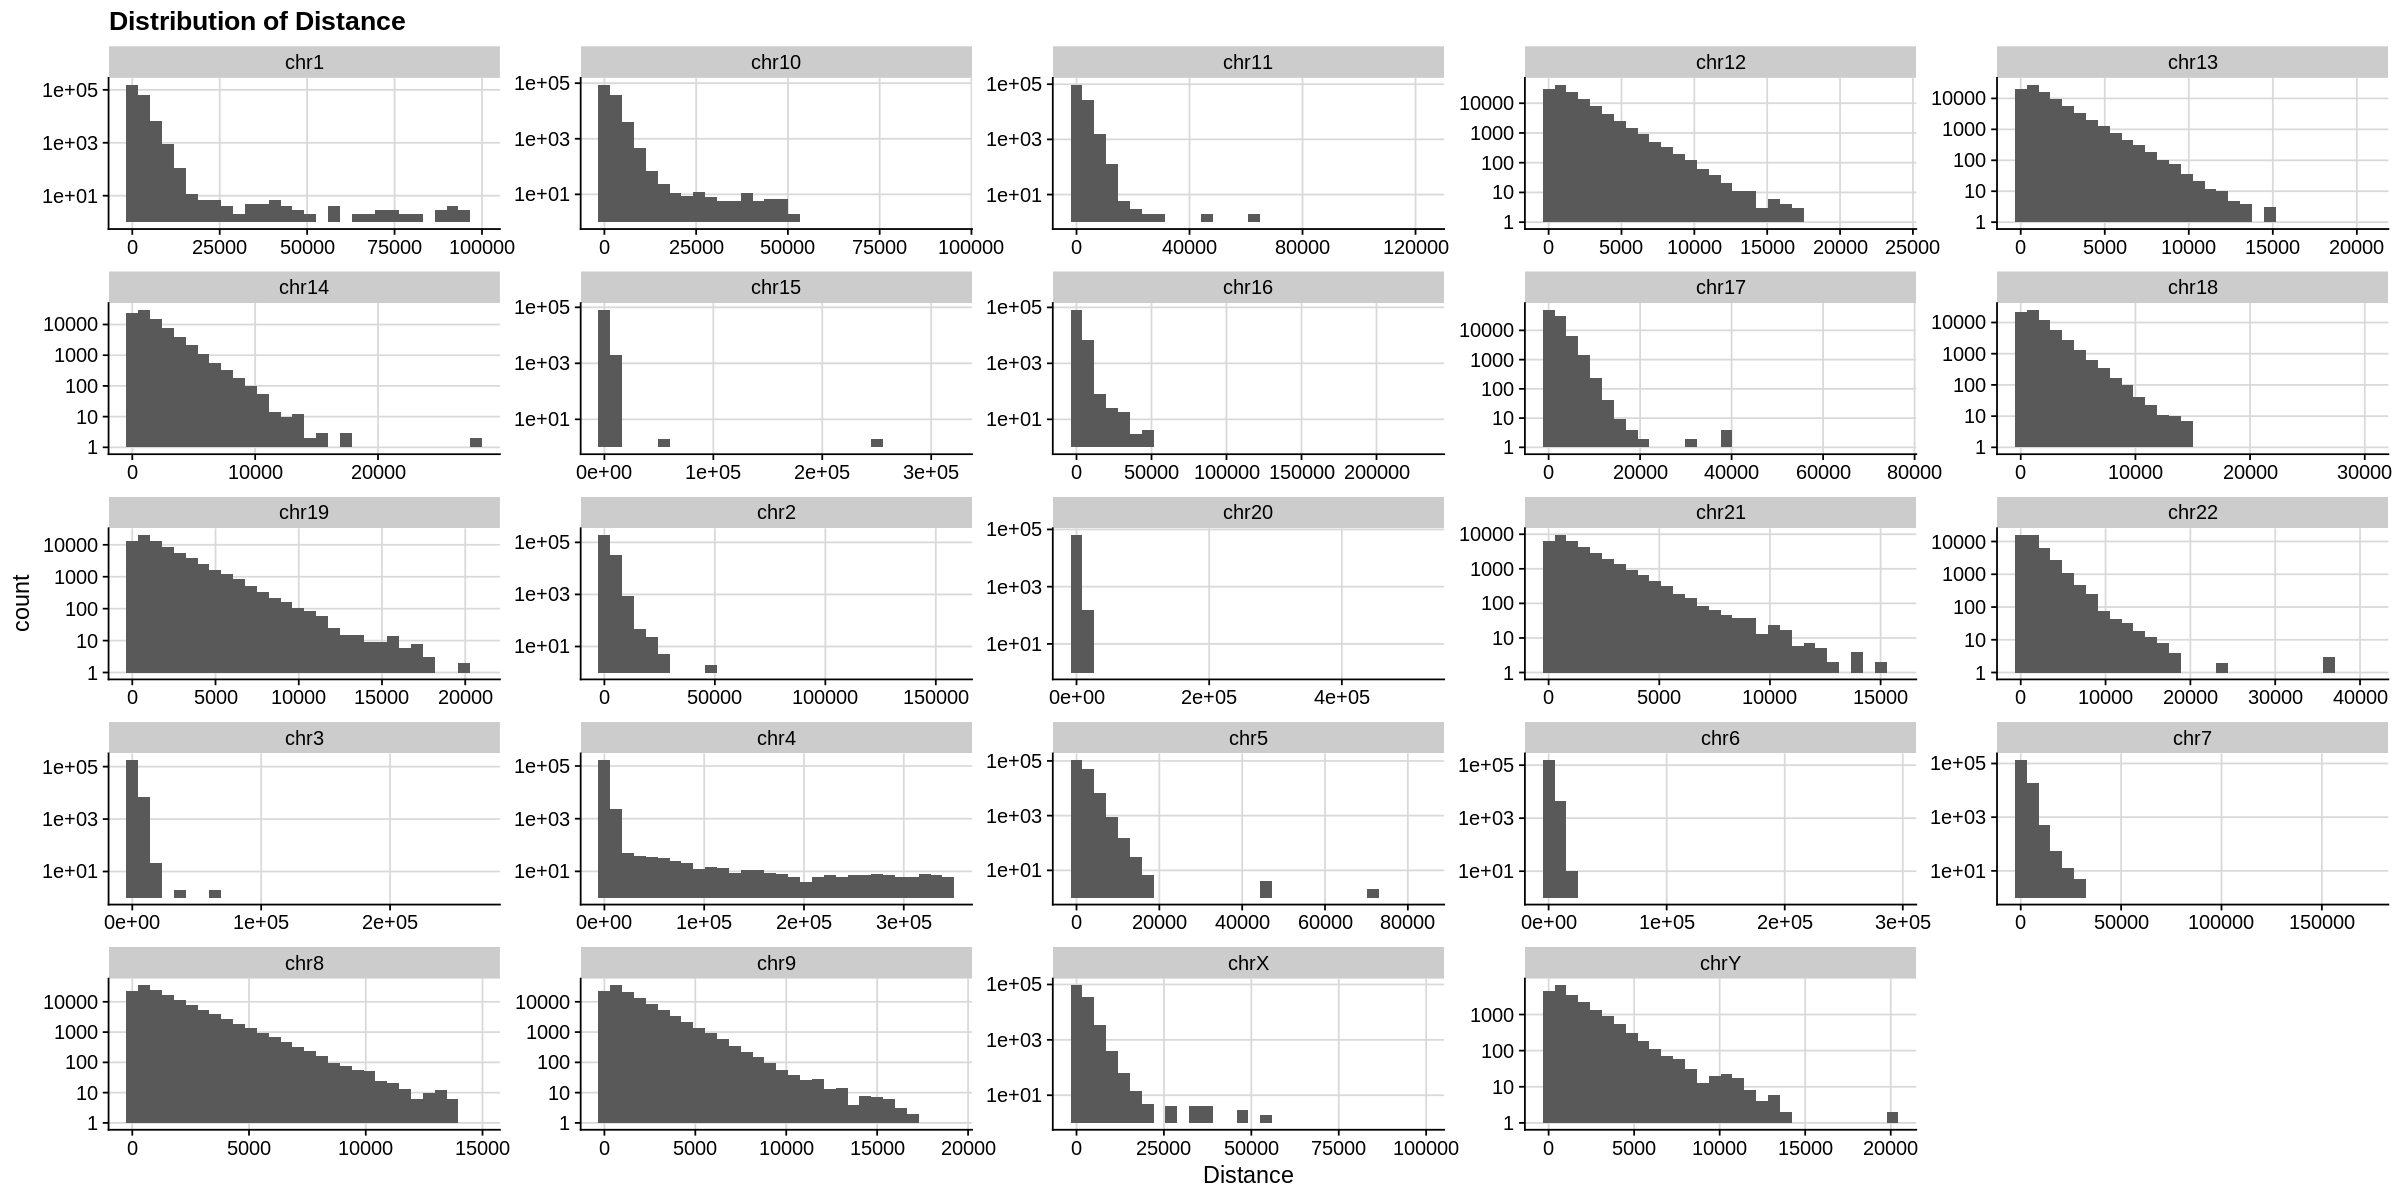

In [53]:
options(repr.plot.height=10, repr.plot.width=20)
ggplot(dat_int, aes(x=Distance)) + 
    geom_histogram() + 
    labs(title="Distribution of Distance") +
    scale_y_log10() +
    theme_cowplot() +
    background_grid() +
    facet_wrap(~MTF1_Chrom, scale="free")

In [43]:
head(lst_dat[[1]])

MTF1_Chrom,MTF1_Start,MTF1_End,MTF1,MTF1_score,MTF2_Chrom,MTF2_Start,MTF2_End,MTF2,MTF2_score,Distance
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr1,12190,12198,AP1/1,7.43060,chr1,14615,14629,NR/20,7.1956,2418
chr1,12950,12959,AP1/1,6.79415,chr1,14615,14629,NR/20,7.1956,1657
chr1,13971,13980,AP1/1,10.96380,chr1,14615,14629,NR/20,7.1956,636
chr1,14158,14166,AP1/1,6.73210,chr1,14615,14629,NR/20,7.1956,450
chr1,15090,15098,AP1/1,7.53870,chr1,15090,15104,NR/20,7.8854,0
chr1,15297,15305,AP1/1,7.65610,chr1,15247,15261,NR/20,7.8434,37


In [19]:
fdiry = file.path(
    FD_ANN, 
    "motif_cluster_jvierstra", 
    "hg38_archetype_motifs_v1")

fname = "AP1_1_NR_20.bed"

chroms  = c(1:22, "X", "Y")
lst_dat = lapply(chroms, function(chrom){
    fname = paste0("dist_chr", chrom)
    dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
    return(dat)
})

In [20]:
lst_dat[[1]] %>% head

MTF1_Chrom,MTF1_Start,MTF1_End,MTF1,MTF1_score,MTF2_Chrom,MTF2_Start,MTF2_End,MTF2,MTF2_score,Distance
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr17,61128,61136,AP1/1,8.0116,chr17,60718,60732,NR/20,8.8112,397
chr17,63311,63319,AP1/1,7.6561,chr17,63497,63512,NR/20,7.7355,179
chr17,64199,64207,AP1/1,7.6561,chr17,64716,64731,NR/20,7.7355,510
chr17,64443,64451,AP1/1,7.6561,chr17,64716,64731,NR/20,7.7355,266
chr17,64565,64573,AP1/1,6.7321,chr17,64716,64731,NR/20,7.7355,144
chr17,64861,64869,AP1/1,7.6561,chr17,64716,64731,NR/20,7.7355,131


In [9]:
fdiry = file.path(
    FD_ANN, 
    "motif_cluster_jvierstra", 
    "hg38_archetype_motifs_v1",
    "dist_chr17")
dir(fdiry)

[1] "AP1_1_NR_20.bed"

In [11]:
cnames = c(
    "MTF1_Chrom",
    "MTF1_Start",
    "MTF1_End",
    "MTF1",
    "MTF1_score",
    "MTF2_Chrom",
    "MTF2_Start",
    "MTF2_End",
    "MTF2",
    "MTF2_score",
    "Distance")

In [12]:
fdiry = file.path(
    FD_ANN, 
    "motif_cluster_jvierstra", 
    "hg38_archetype_motifs_v1",
    "dist_chr17")
fname = "AP1_1_NR_20.bed"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, col_names = cnames)
head(dat)

Rows: 90246 Columns: 11

── Column specification ─────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): MTF1_Chrom, MTF1, MTF2_Chrom, MTF2
dbl (7): MTF1_Start, MTF1_End, MTF1_score, MTF2_Start, MTF2_End, MTF2_score,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



MTF1_Chrom,MTF1_Start,MTF1_End,MTF1,MTF1_score,MTF2_Chrom,MTF2_Start,MTF2_End,MTF2,MTF2_score,Distance
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr17,61128,61136,AP1/1,8.0116,chr17,60718,60732,NR/20,8.8112,397
chr17,63311,63319,AP1/1,7.6561,chr17,63497,63512,NR/20,7.7355,179
chr17,64199,64207,AP1/1,7.6561,chr17,64716,64731,NR/20,7.7355,510
chr17,64443,64451,AP1/1,7.6561,chr17,64716,64731,NR/20,7.7355,266
chr17,64565,64573,AP1/1,6.7321,chr17,64716,64731,NR/20,7.7355,144
chr17,64861,64869,AP1/1,7.6561,chr17,64716,64731,NR/20,7.7355,131


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



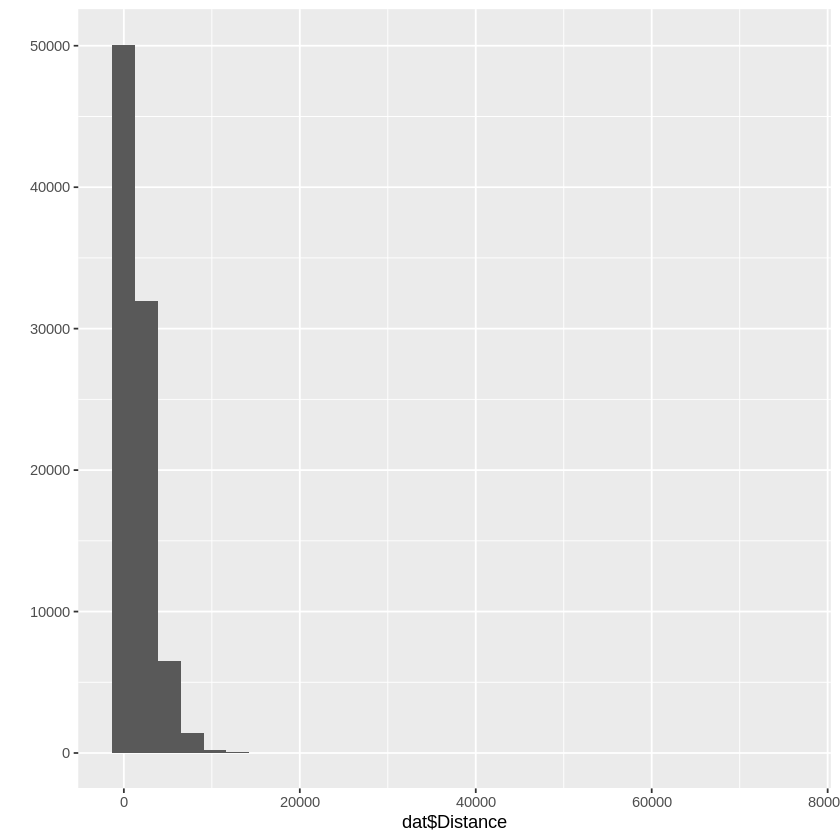

In [13]:
qplot(dat$Distance)